In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from functools import reduce
from sklearn.feature_extraction.text import CountVectorizer
import operator

Sklearn Bayers

In [202]:
df=pd.read_table(r'C:\Users\asd\Desktop\SMSSpamCollection.txt',encoding='latin',header=-1,names=['label','text'])
df.head()

F:\course python\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: read_table is deprecated, use read_csv instead, passing sep='\t'.
  """Entry point for launching an IPython kernel.


,label,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [203]:
df['numlabel']=df['label'].map({'ham':0,'spam':1})
print(df.head())

  label                                               text  numlabel
0   ham  Go until jurong point, crazy.. Available only ...         0
1   ham                      Ok lar... Joking wif u oni...         0
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...         1
3   ham  U dun say so early hor... U c already then say...         0
4   ham  Nah I don't think he goes to usf, he lives aro...         0


In [204]:
#statistic the numbers of each category
print(df['numlabel'].value_counts())
print(len(df['numlabel']))

0    4825
1     747
Name: numlabel, dtype: int64
5572


In [234]:
747/(4825+747)

0.13406317300789664

In [205]:

text_lengths=[len(df.loc[i,'text']) for i in range(len(df))]
print('the minimum length is:%d'%(min(text_lengths)))

the minimum length is:2


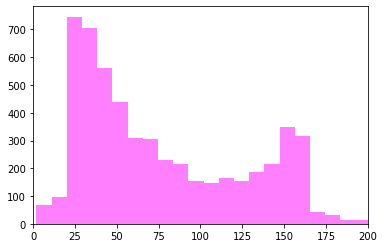

In [207]:
plt.hist(text_lengths,100,facecolor='magenta',alpha=0.5) #其中100是指定有多少条条形
plt.xlim([0,200])
plt.show()

In [208]:
#Vectorize text

vectorizer=CountVectorizer()
x=vectorizer.fit_transform(df.text).toarray()
y=df.numlabel
print(x.shape)

(5572, 8749)


In [209]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=21)


In [210]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score,roc_auc_score

In [466]:

clf=MultinomialNB(alpha=1.0,fit_prior=True)
clf.fit(x_train,y_train)
y_pred_1=clf.predict(x_test)


print('sklearn')
print(accuracy_score(y_test,y_pred_1),roc_auc_score(y_test,y_pred_1))


sklearn
0.9865470852017937 0.9786626344086021


Code by Hands 

In [247]:
Y_train=y_train.tolist()
Y_test=y_test.tolist()

In [422]:
def trainNB0(x_train,y_train):
    numTrainDocs=len(x_train)
    numWords=len(x_train[0])
    pClass1=sum(y_train)/float(numTrainDocs)
    
    p0Num=np.zeros(numWords)
    p1Num=np.zeros(numWords)
    
    p0Denom=0.0
    
    p1Denom=0.0
    
    
    
    for i in range(numTrainDocs):
        
        
        
        if y_train[i]==1:
            
            p1Num+=x_train[i]
            
            p1Denom+=sum(x_train[i])
            
            
            
        else:
            
            p0Num+=x_train[i]
            
            p0Denom+=sum(x_train[i])
            
            
            
   # print(p1Num, p1Denom, p0Num,p0Denom )
    
    p1Vect=p1Num/p1Denom 
    
    p0Vect=p0Num/p0Denom
    
   
    
    return p0Vect,p1Vect,pClass1



    
        

In [456]:
def classify(x_test,x_train,y_train):
    
    
    p0Vect,p1Vect,pClass1=trainNB0(x_train,y_train)
    
   
    predict=[]   
        
    for i in range(len(x_test)):
        
               
        p1=sum(x_test[i]*p1Vect)+np.log(pClass1)
        p0=sum(x_test[i]*p0Vect)+np.log(1.0-pClass1)
        
        if p1>p0:
            a=1
        else:
            a=0
            
        predict.append(a) 
    
        
        
    return predict

In [457]:
predict=classify(x_test,x_train,Y_train)

In [458]:
accuracy_score(Y_test,predict)

0.8609865470852018

In [462]:
roc_auc_score(Y_test,predict)

0.5

In [463]:
#sklearn

print(accuracy_score(y_test,y_pred_1),roc_auc_score(y_test,y_pred_1))


0.9865470852017937 0.9786626344086021
0.967741935483871 0.9375 0.9523809523809523


In [465]:
#by hands

print(accuracy_score(y_test,predict),roc_auc_score(y_test,predict))


0.8609865470852018 0.5
